### Including libraries

In [16]:

# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [17]:
df=pd.read_csv('ev_dataset.csv')
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


### Data pre-processing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [19]:
df.shape

(99, 13)

In [20]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [21]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [22]:
# Observing unique value for object dtype columns
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
  print(col,':',df[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [23]:
df['Age'].describe()

count    99.000000
mean     36.313131
std       6.246054
min      26.000000
25%      31.000000
50%      36.000000
75%      41.000000
max      51.000000
Name: Age, dtype: float64

In [24]:
#Performing Binning on Age column
bins = [25,30,35,40,45,52]
df['Age'] = pd.cut(df['Age'], bins) # cut()--> for only binning purposes
df['Age'] = df.Age.astype(str)

### Cleaning data

In [25]:
## Double checking the percentage of empty entries column wise
df.isnull().sum() / df.shape[0] * 100.00

Age                 0.0
Profession          0.0
Marrital Status     0.0
Education           0.0
No of Dependents    0.0
Personal loan       0.0
House Loan          0.0
Wife Working        0.0
Salary              0.0
Wife Salary         0.0
Total Salary        0.0
Make                0.0
Price               0.0
dtype: float64

The entry 'm' for wife working is strange.

In [26]:
df[df['Wife Working']=='m']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,"(30, 35]",Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


There is only one such entry and the wife's salary is 0. It is safe to say that the wife is unemployed.

In [27]:
df=df.replace(to_replace ="m", value ="No")
df.loc[11]

Age                 (30, 35]
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

### EDA

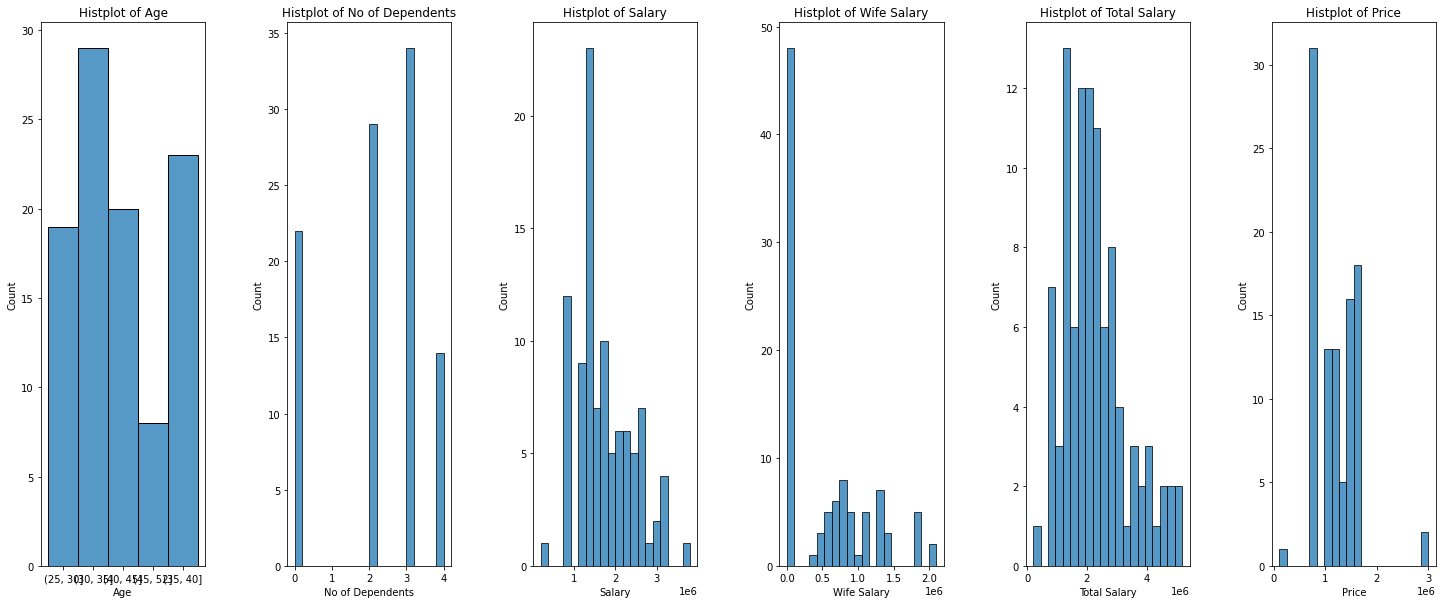

In [31]:
plt.figure(1, figsize=(25,10))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins = 20)
  plt.title('Histplot of {}'.format(x))
plt.show()

Age group between 25 to 50 has the highest density.

Most people have a total salary of 30 lakh

Wives of most of the people are unemployed

Most people spent around 10 to 20 lakhs for cars

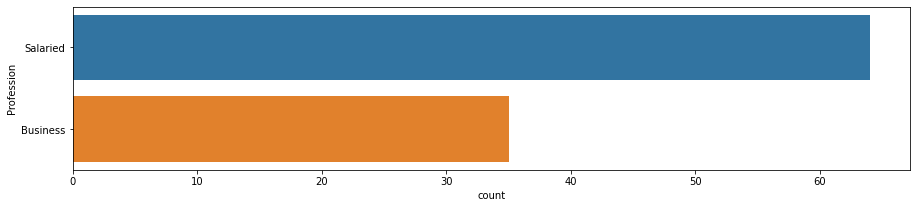

In [44]:
plt.figure(figsize=(15,3))
sns.countplot(y='Profession', data=df)
plt.show()

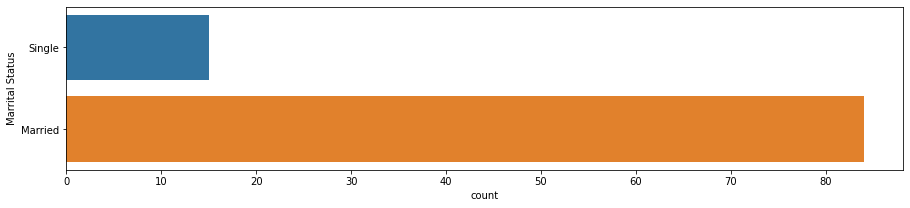

In [43]:
plt.figure(figsize=(15,3))
sns.countplot(y='Marrital Status',data=df)
plt.show()

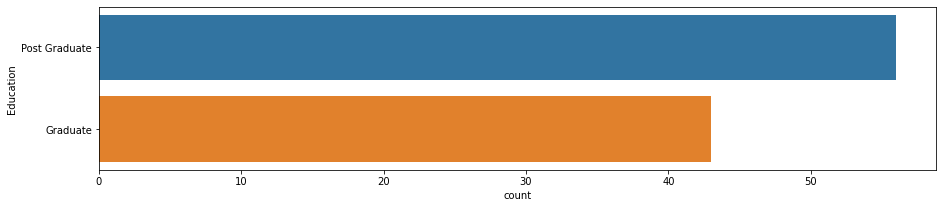

In [42]:
plt.figure(figsize=(15,3))
sns.countplot(y='Education',data=df)
plt.show()

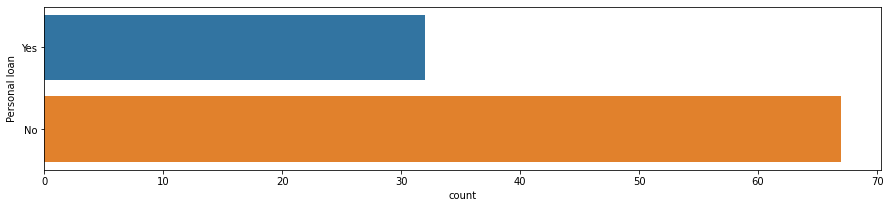

In [41]:
plt.figure(figsize=(15,3))
sns.countplot(y='Personal loan',data=df)
plt.show()

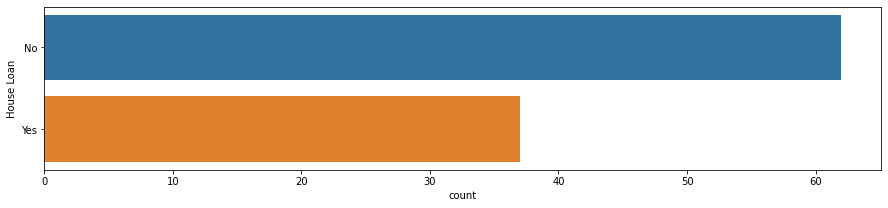

In [40]:
plt.figure(figsize=(15,3))
sns.countplot(y='House Loan',data=df)
plt.show()

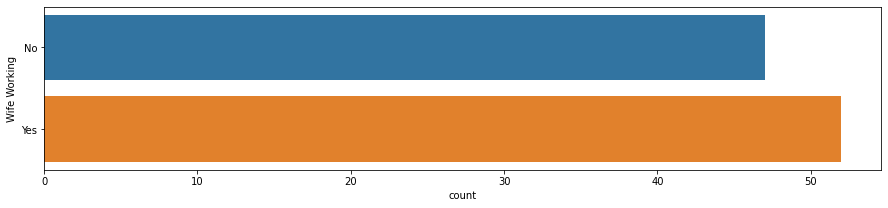

In [39]:
plt.figure(figsize=(15,3))
sns.countplot(y='Wife Working',data=df)
plt.show()

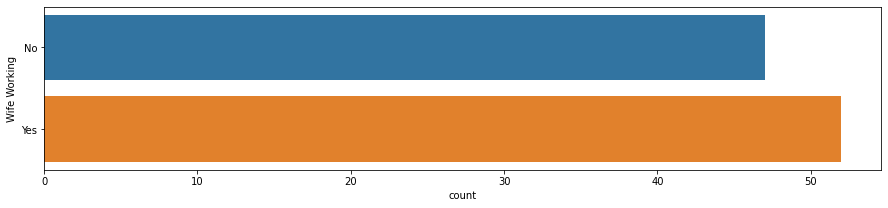

In [38]:
plt.figure(figsize=(15,3))
sns.countplot(y='Wife Working',data=df)
plt.show()

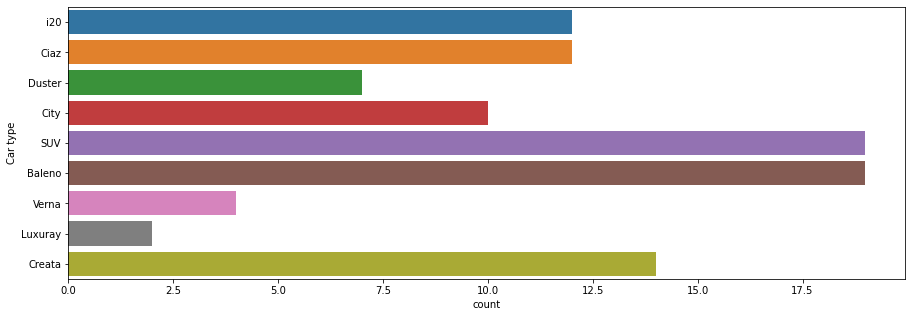

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(y='Make',data=df)
plt.ylabel('Car type')
plt.show()

<AxesSubplot:>

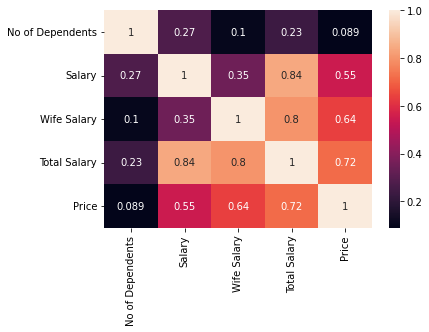

In [46]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True) 

### Behavioral and Psychographic Analysis

In [ ]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols, y = 'Make', data=df)
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

**1. Relation between consumers' age and the vehicles they tend to purchase**

- Make of vehicles they tend to purchase

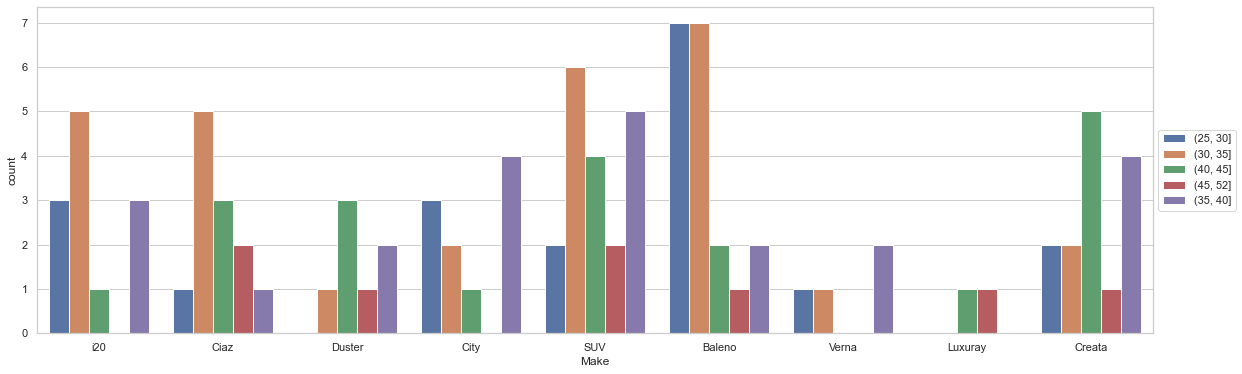

In [52]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Age")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Price of vehicle owned

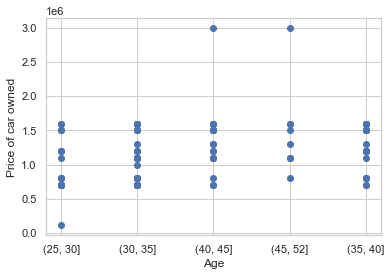

In [53]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(df['Age'],df['Price'])

**2. Relation between consumers' total salary and the vehicles they tend to purchase**

- Make of vehicles they tend to purchase

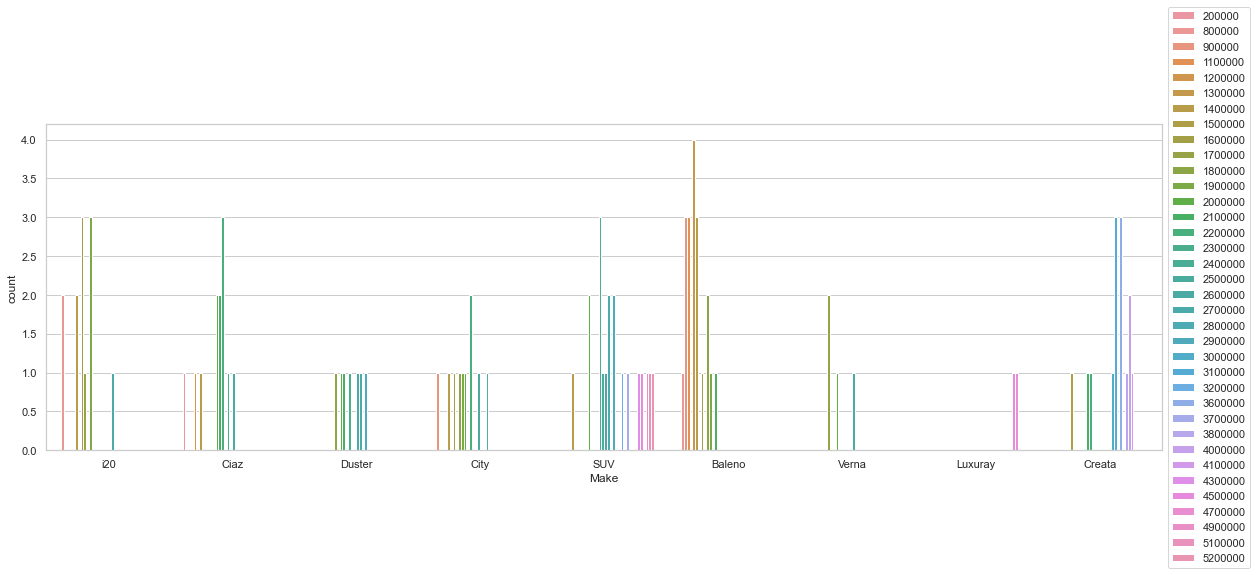

In [54]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))